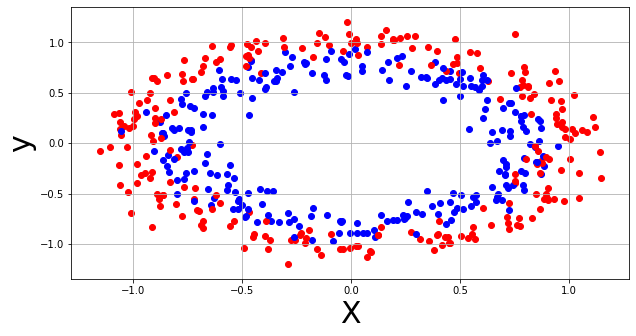

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import multiprocessing

# for reproducibility
np.random.seed(1000)

# Create DataSet
X,y = make_circles(500,noise=0.1)

fig,ax = plt.subplots(1,1,figsize = (10,5))

ax.grid()
ax.set_xlabel("X",fontsize=30)
ax.set_ylabel("y",fontsize=30)

for i in range(len(X)):
    if y[i] ==0:
        ax.scatter(X[i,0],X[i,1],color='r')
    else:
        ax.scatter(X[i,0],X[i,1],color='b')

In [3]:
# Define a Param grid

param_grid = [{ 
                'kernel' : ['linear','rbf','poly','sigmoid'],
                 'C' :   [0.1,0.2,0.4,0.5,1.0,1.5,1.8,2.0,2.5,3.0]
              }]

In [4]:
# Create a train grid search on SVM classifier
gs = GridSearchCV(estimator=SVC(),param_grid=param_grid,scoring='accuracy',cv=10,n_jobs= multiprocessing.cpu_count())

gs.fit(X, y)

GridSearchCV(cv=10, estimator=SVC(), n_jobs=8,
             param_grid=[{'C': [0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5,
                                3.0],
                          'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}],
             scoring='accuracy')

In [5]:
print(gs.best_estimator_)
print('Kernel SVM score: %.3f' % gs.best_score_)

SVC(C=1.5)
Kernel SVM score: 0.880
